In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

cluster_data_df = pd.read_csv(r"C:\Users\Tombra\Desktop\mini-project-III\cluster_data.csv", sep=",")

cluster_data_df.head()

,cust_id,avg(amount/tran),credit_balance,savings_balance,checking_balance,income,age,years_with_bank,nbr_children,gender,city_name
0,1362480,269.266706,20.00,1187.97,86.86,50890,33,3,2,M,New York City
1,1362484,381.386000,369.72,2122.17,95.32,10053,42,2,0,F,Denver
2,1362485,278.479306,1100.00,0.00,45.49,22690,25,4,0,F,New York City
3,1362486,98.289600,0.00,116.24,3312.27,10701,76,6,0,F,Dallas
4,1362487,211.563389,1548.23,12.89,1401.21,6605,71,1,0,M,Los Angeles


In [8]:
cluster_data_df['city'] =pd.factorize(cluster_data_df.city_name)[0]

#cluster_data_df

In [9]:
cluster_data_df['gencode'] =pd.factorize(cluster_data_df.gender)[0]

cluster_data_df

,cust_id,avg(amount/tran),credit_balance,savings_balance,checking_balance,income,age,years_with_bank,nbr_children,gender,city_name,gencode,city
0,1362480,269.266706,20.00,1187.97,86.86,50890,33,3,2,M,New York City,0,0
1,1362484,381.386000,369.72,2122.17,95.32,10053,42,2,0,F,Denver,1,1
2,1362485,278.479306,1100.00,0.00,45.49,22690,25,4,0,F,New York City,1,0
3,1362486,98.289600,0.00,116.24,3312.27,10701,76,6,0,F,Dallas,1,2
4,1362487,211.563389,1548.23,12.89,1401.21,6605,71,1,0,M,Los Angeles,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,1363486,0.000000,1.00,0.00,0.00,39942,41,1,5,F,Honolulu,1,26
638,1363490,2.853333,0.00,2301.53,0.00,0,15,7,0,F,Honolulu,1,26
639,1363492,1103.970502,6869.00,1116.10,106.14,142274,54,4,0,M,Dallas,0,2
640,1363493,147.857778,1.00,553.61,2053.90,30068,69,5,0,M,Houston,0,5


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans   #<---- We will use sci-kit learns implementation of K-means
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

%matplotlib inline

In [11]:
import pandas as pd

# Create a new DataFrame based on the existing DataFrame
demographic_df = cluster_data_df[['age', 'income','years_with_bank','nbr_children','gencode']].copy()

# Print the new table
print(demographic_df)

     age  income  years_with_bank  nbr_children  gencode
0     33   50890                3             2        0
1     42   10053                2             0        1
2     25   22690                4             0        1
3     76   10701                6             0        1
4     71    6605                1             0        0
..   ...     ...              ...           ...      ...
637   41   39942                1             5        1
638   15       0                7             0        1
639   54  142274                4             0        0
640   69   30068                5             0        0
641   36   19639                3             3        1

[642 rows x 5 columns]


In [13]:
#Scale
scaler = StandardScaler().set_output(transform="pandas")
df_scaled = scaler.fit_transform(demographic_df)
df_scaled.head()

,age,income,years_with_bank,nbr_children,gencode
0,-0.505884,1.303330,-0.303070,1.180344,-1.188921
1,-0.028816,-0.580153,-0.674388,-0.632529,0.841099
2,-0.929945,0.002690,0.068249,-0.632529,0.841099
3,1.773444,-0.550266,0.810885,-0.632529,0.841099
4,1.508406,-0.739182,-1.045707,-0.632529,-1.188921


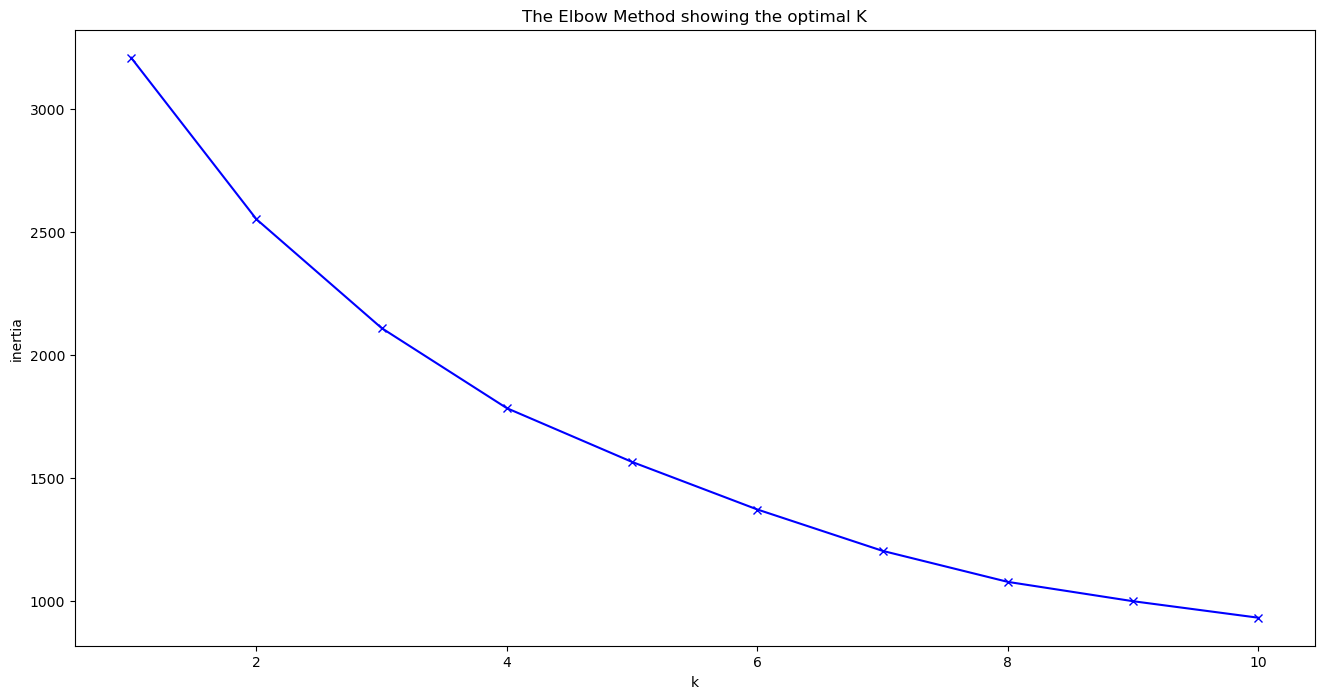

In [16]:
#elbow method
inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)
    
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

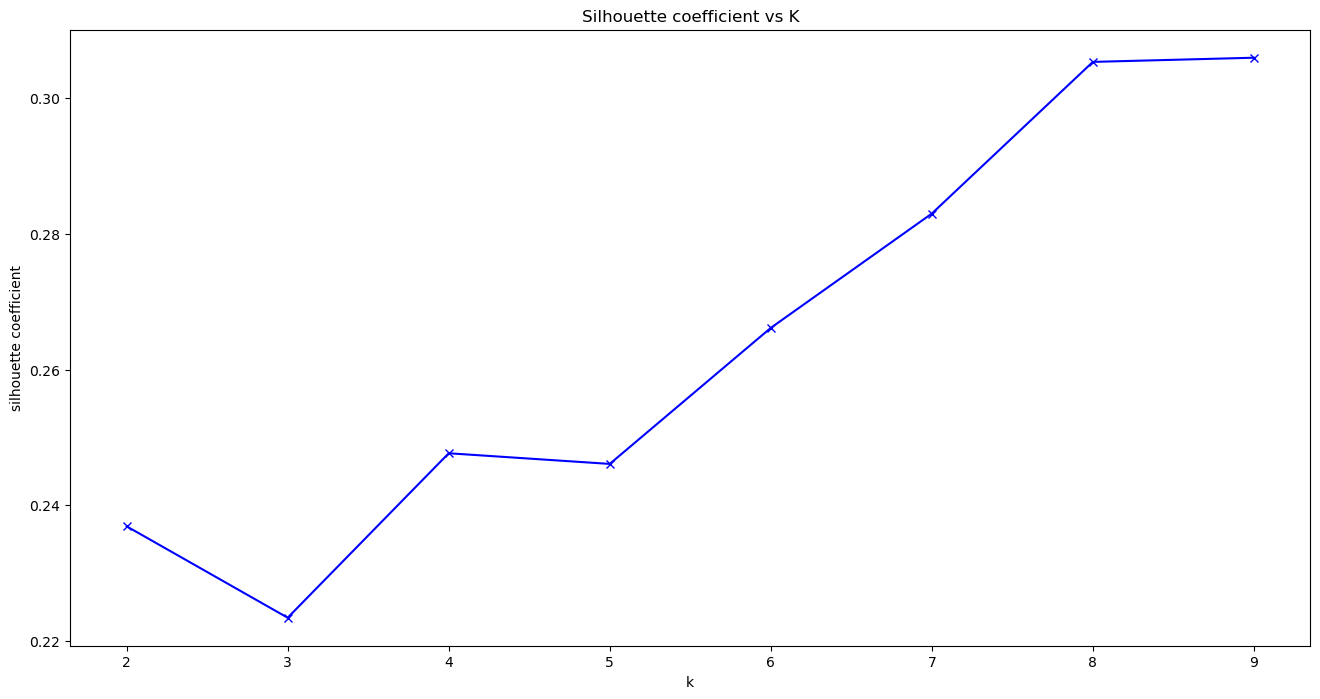

In [17]:
#Silhouette Method
from sklearn.metrics import silhouette_score

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    label=kmeanModel.predict(df_scaled)
    silhouettes.append(silhouette_score(df_scaled,label))
    
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [32]:
import pandas as pd
from sklearn.decomposition import PCA

# reducing the features to 2 dimensions

# Select the columns for PCA
selected_columns = ['age', 'income','years_with_bank','nbr_children','gencode']

# Extract the selected columns as the feature matrix
X = df_scaled[selected_columns]

# Create an instance of PCA and specify the number of components
pca = PCA(n_components=2)

# Fit the PCA model to the data and transform the data to the new feature space
X_pca = pca.fit_transform(X)

# Create a DataFrame for the transformed data
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Print the transformed data
print(df_pca)


          PC1       PC2
0    1.286118  1.648612
1   -1.054471 -0.267449
2   -0.885430 -0.101016
3    0.296052 -2.017660
4    0.022978 -0.450781
..        ...       ...
637  1.369391  2.866539
638 -1.543842 -0.718873
639  4.202251  0.843997
640  1.147599 -0.991628
641  0.165990  1.326111

[642 rows x 2 columns]


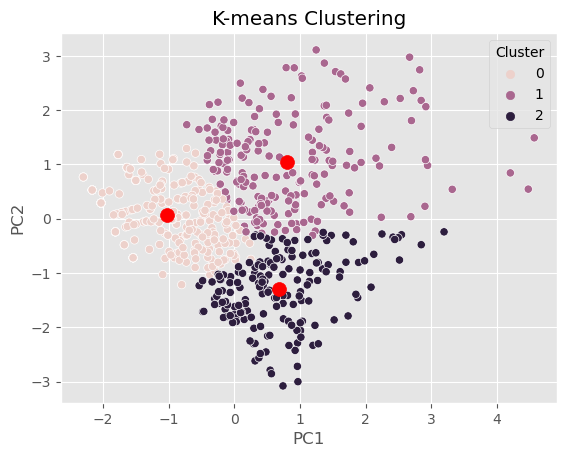

In [101]:

# Select the columns for clustering
selected_columns = ['PC1', 'PC2']

# Extract the selected columns as the feature matrix
X = df_pca[selected_columns]

# Specify the number of clusters (K)
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_pca)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Get the cluster centroids
cluster_centers = kmeans.cluster_centers_

# Add cluster labels to the DataFrame
df_pca['Cluster'] = cluster_labels

# Define a color palette for the clusters
cluster_colors = ["red", "green", "blue"]  # Add more colors if needed

# Visualize the clustering results
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca)

# Plot the cluster centroids
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='o', s=100)

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')

# Display the plot
plt.show()


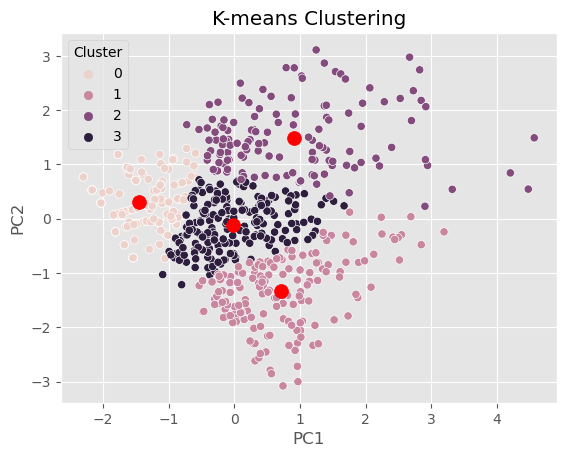

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Select the columns for clustering
selected_columns = ['PC1', 'PC2']

# Extract the selected columns as the feature matrix
X = df_pca[selected_columns]

# Specify the number of clusters (K)
n_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_pca)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_


# Get the cluster centroids
cluster_centers = kmeans.cluster_centers_

# Add cluster labels to the DataFrame
df_pca['Cluster'] = cluster_labels

# Define a color palette for the clusters
cluster_colors = ["red", "green", "blue", "yellow"]  # Add more colors if needed


# Visualize the clustering results
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca)

# Plot the cluster centroids
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='o', s=100)

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')

# Display the plot
plt.show()


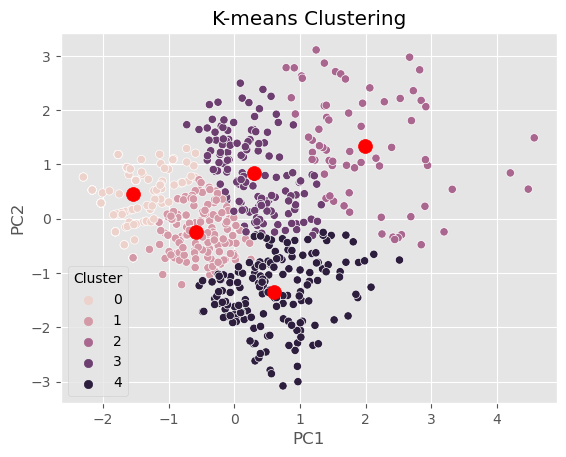

In [104]:
# Select the columns for clustering
selected_columns = ['PC1', 'PC2']

# Extract the selected columns as the feature matrix
X = df_pca[selected_columns]

# Specify the number of clusters (K)
n_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_pca)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Get the cluster centroids
cluster_centers = kmeans.cluster_centers_

# Add cluster labels to the DataFrame
df_pca['Cluster'] = cluster_labels

# Define a color palette for the clusters
cluster_colors = ["red", "green", "blue", "yellow","purple"]  # Add more colors if needed

# Visualize the clustering results
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca)

# Plot the cluster centroids
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='o', s=100)

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')

# Display the plot
plt.show()


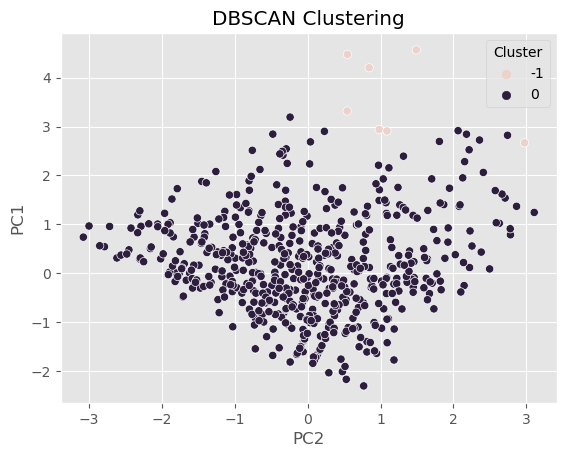

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN



# Select the columns for clustering
selected_columns = ['PC2', 'PC1']

# Extract the selected columns as the feature matrix
X = df_pca[selected_columns]

# Set the parameters for DBSCAN
eps = 0.5  # The maximum distance between two samples to be considered as in the same neighborhood
min_samples = 5  # The minimum number of samples in a neighborhood for a point to be considered as a core point

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X)

# Add cluster labels to the DataFrame
df_pca['Cluster'] = cluster_labels

# Visualize the clustering results
sns.scatterplot(x='PC2', y='PC1', hue='Cluster', data=df_pca)

# Add labels and title
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.title('DBSCAN Clustering')

# Display the plot
plt.show()


In [48]:
# count cluster labels
df_pca['Cluster'].value_counts()

2    260
1    228
0    154
Name: Cluster, dtype: int64

In [51]:
#reprint scaled data
df_scaled.head()

,age,income,years_with_bank,nbr_children,gencode
0,-0.505884,1.303330,-0.303070,1.180344,-1.188921
1,-0.028816,-0.580153,-0.674388,-0.632529,0.841099
2,-0.929945,0.002690,0.068249,-0.632529,0.841099
3,1.773444,-0.550266,0.810885,-0.632529,0.841099
4,1.508406,-0.739182,-1.045707,-0.632529,-1.188921


In [52]:
#these are the coefficients used for each PC (in the linear combination calculation).
pca.components_

array([[ 0.49755504,  0.68762621,  0.29169598,  0.35537605, -0.26120967],
       [-0.50345054,  0.23629091, -0.57223429,  0.56685376, -0.20476548]])

In [53]:
demographic_df.head()

,age,income,years_with_bank,nbr_children,gencode
0,33,50890,3,2,0
1,42,10053,2,0,1
2,25,22690,4,0,1
3,76,10701,6,0,1
4,71,6605,1,0,0


In [66]:
cluster_0_means = demographic_df[df_with_clusters['label']==0].mean()
cluster_1_means = demographic_df[df_with_clusters['label']==1].mean()
cluster_2_means = demographic_df[df_with_clusters['label']==2].mean()

means = pd.DataFrame([cluster_0_means, cluster_1_means, cluster_2_means])
means

,age,income,years_with_bank,nbr_children,gencode
0,59.928854,22421.806324,4.976285,0.169960,0.624506
1,23.129808,8849.581731,3.048077,0.134615,0.581731
2,40.552486,38762.994475,3.077348,2.082873,0.535912


In [69]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

feature_names = ['age','income','years_with_bank','nbr_children','geocode']
cluster_0_means = [demographic_df[df_with_clusters['label']==0].mean()]
cluster_1_means = [demographic_df[df_with_clusters['label']==1].mean()]
cluster_2_means = [demographic_df[df_with_clusters['label']==2].mean()]


angles=np.linspace(0,2*np.pi,len(feature_names), endpoint=False)
print(angles)

[0.         1.25663706 2.51327412 3.76991118 5.02654825]


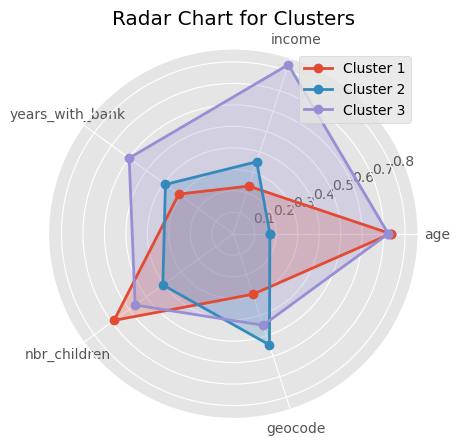

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Get cluster centers and feature names
cluster_centers = kmeans.cluster_centers_
feature_names = ['age', 'income', 'years_with_bank','nbr_children', 'geocode']


# Function to plot radar chart
def plot_radar_chart(cluster_centers, feature_names):
    categories = feature_names
    num_clusters = cluster_centers.shape[0]
    num_features = cluster_centers.shape[1]

    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
    angles += angles[:1]

    # Create a figure and polar axis
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)

    # Plot radar chart for each cluster
    for i in range(num_clusters):
        values = cluster_centers[i].tolist()
        values += [values[0]]
        ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {i + 1}')
        ax.fill(angles, values, alpha=0.25)

    # Set the labels for each axis
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Add legend
    ax.legend(loc='upper right')

    # Set the title
    ax.set_title('Radar Chart for Clusters')

    # Fill the area with a grid
    ax.grid(True)

    # Show the plot
    plt.show()

# Plot radar chart for clusters
plot_radar_chart(cluster_centers, feature_names)
